# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [121]:
!pip install palmerpenguins
import numpy as np
import pandas as pd
from sys import exit
from palmerpenguins import load_penguins
from plotnine import *

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [30]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [31]:
penguins = penguins.dropna()
X = penguins.drop('species', axis = 1)
y = penguins['species']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Model 1- kNN models(k=1)

In [81]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, drop = "first", handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors = 1))]
)

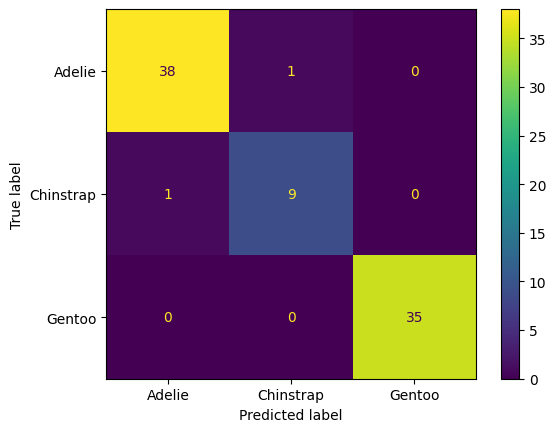

In [82]:
lr_pipeline_1_fitted = lr_pipeline_1.fit(X_train, y_train)

y_pred = lr_pipeline_1_fitted.predict(X)
y_pred_test = lr_pipeline_1_fitted.predict(X_test)

ConfusionMatrixDisplay.from_estimator(lr_pipeline_1_fitted, X_test, y_test)

In [83]:
y_pred = cross_val_predict(lr_pipeline_1, X, y, cv=5)

In [84]:
#Overall Accuracy
accuracy_score(y, y_pred)

0.9519519519519519

In [85]:
#Precision, Recall, AUC, and F1-score for each species
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       0.96      0.92      0.94       146
   Chinstrap       0.85      0.93      0.89        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.95       333
   macro avg       0.94      0.95      0.94       333
weighted avg       0.95      0.95      0.95       333



# Model 2- kNN models(k=10)

In [44]:
lr_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors = 10))]
)

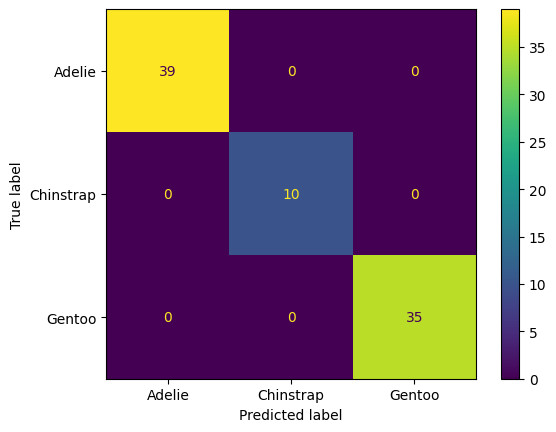

In [73]:
lr_pipeline_2_fitted = lr_pipeline_2.fit(X_train, y_train)

y_pred = lr_pipeline_2_fitted.predict(X)
y_pred_test = lr_pipeline_2_fitted.predict(X_test)

ConfusionMatrixDisplay.from_estimator(lr_pipeline_2_fitted, X_test, y_test)

In [74]:
y_pred2 = cross_val_predict(lr_pipeline_2, X, y, cv=5)

In [86]:
#Overall Accuracy
accuracy_score(y, y_pred2)

0.990990990990991

In [87]:
#Precision, Recall, AUC, and F1-score for each species
print(classification_report(y, y_pred2))

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.97      0.98        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



# Model 3- DecisionTree models (max_depth = 3)

In [94]:
lr_pipeline_3 = Pipeline(
  [("preprocessing", ct),
  ("decision_tree", DecisionTreeClassifier(max_depth = 3))]
)

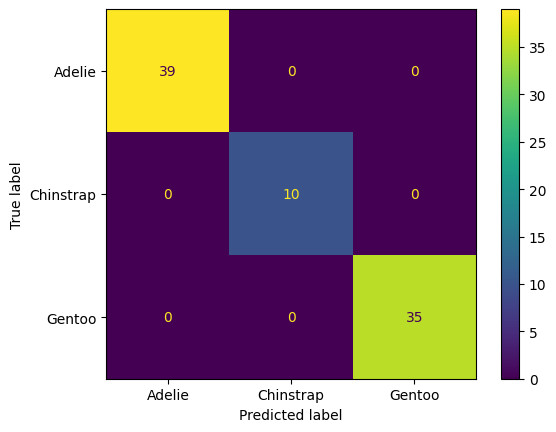

In [95]:
lr_pipeline_3_fitted = lr_pipeline_3.fit(X_train, y_train)

y_pred = lr_pipeline_3_fitted.predict(X)
y_pred_test = lr_pipeline_3_fitted.predict(X_test)

ConfusionMatrixDisplay.from_estimator(lr_pipeline_3_fitted, X_test, y_test)

In [96]:
y_pred3 = cross_val_predict(lr_pipeline_3, X, y, cv=5)

In [97]:
#Overall Accuracy
accuracy_score(y, y_pred3)

0.960960960960961

In [98]:
#Precision, Recall, AUC, and F1-score for each species
print(classification_report(y, y_pred2))

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.97      0.98        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



# Model 4- DecisionTree models (max_depth = 10)

In [100]:
lr_pipeline_4 = Pipeline(
  [("preprocessing", ct),
  ("decision_tree", DecisionTreeClassifier(max_depth = 10))]
)

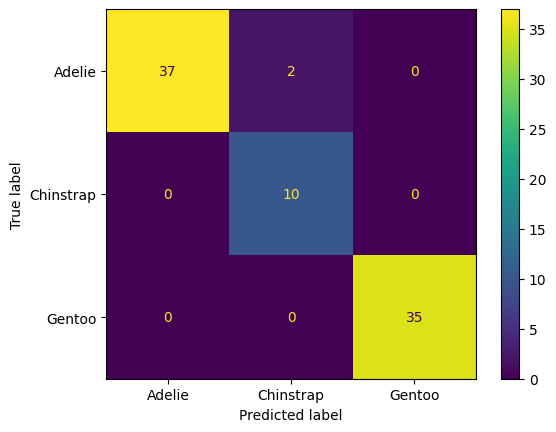

In [101]:
lr_pipeline_4_fitted = lr_pipeline_4.fit(X_train, y_train)

y_pred = lr_pipeline_4_fitted.predict(X)
y_pred_test = lr_pipeline_4_fitted.predict(X_test)

ConfusionMatrixDisplay.from_estimator(lr_pipeline_4_fitted, X_test, y_test)

In [102]:
y_pred4 = cross_val_predict(lr_pipeline_4, X, y, cv=5)

In [103]:
#Overall Accuracy
accuracy_score(y, y_pred4)

0.972972972972973

In [104]:
#Precision, Recall, AUC, and F1-score for each species
print(classification_report(y, y_pred4))

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97       146
   Chinstrap       0.97      0.96      0.96        68
      Gentoo       0.98      0.99      0.98       119

    accuracy                           0.97       333
   macro avg       0.97      0.97      0.97       333
weighted avg       0.97      0.97      0.97       333



# ROC and AUC for Adelie

In [146]:
species = (y=='Adelie')

y_1 = cross_val_predict(lr_pipeline_1, X, species, cv=5, method = 'predict_proba')[:,1]
fpr1, tpr1, thresholds1 = roc_curve(species, y_1)
roc1 = pd.DataFrame({'Model': 'KNN1','FPR': fpr1, 'TPR': tpr1})
print(f"The AUC of model 1 for Adelie is {roc_auc_score(species, y_1):.4f}")

The AUC of model 1 for Adelie is 0.9435


In [144]:
y_2 = cross_val_predict(lr_pipeline_2, X, species, cv=5, method = 'predict_proba')[:,1]
fpr2, tpr2, thresholds2 = roc_curve(species, y_2)
roc2 = pd.DataFrame({'Model': 'KNN10','FPR': fpr2, 'TPR': tpr2})
print(f"The AUC of model 2 for Adelie is {roc_auc_score(species, y_2):.4f}")

The AUC of model 2 for Adelie is 0.9886


In [147]:
y_3 = cross_val_predict(lr_pipeline_3, X, species, cv=5, method = 'predict_proba')[:,1]
fpr3, tpr3, thresholds3 = roc_curve(species, y_3)
roc3 = pd.DataFrame({'Model': 'DecisonTree, depth3','FPR': fpr3, 'TPR': tpr3})
print(f"The AUC of model 3 for Adelie is {roc_auc_score(species, y_3):.4f}")

The AUC of model 3 for Adelie is 0.9711


In [148]:
y_4 = cross_val_predict(lr_pipeline_4, X, species, cv=5, method = 'predict_proba')[:,1]
fpr4, tpr4, thresholds4 = roc_curve(species, y_4)
roc4 = pd.DataFrame({'Model': 'DecisonTree, depth10','FPR': fpr4, 'TPR': tpr4})
print(f"The AUC of model 4 for Adelie is {roc_auc_score(species, y_4):.4f}")

The AUC of model 4 for Adelie is 0.9642


In [149]:
roc = pd.concat([roc1, roc2, roc3, roc4])

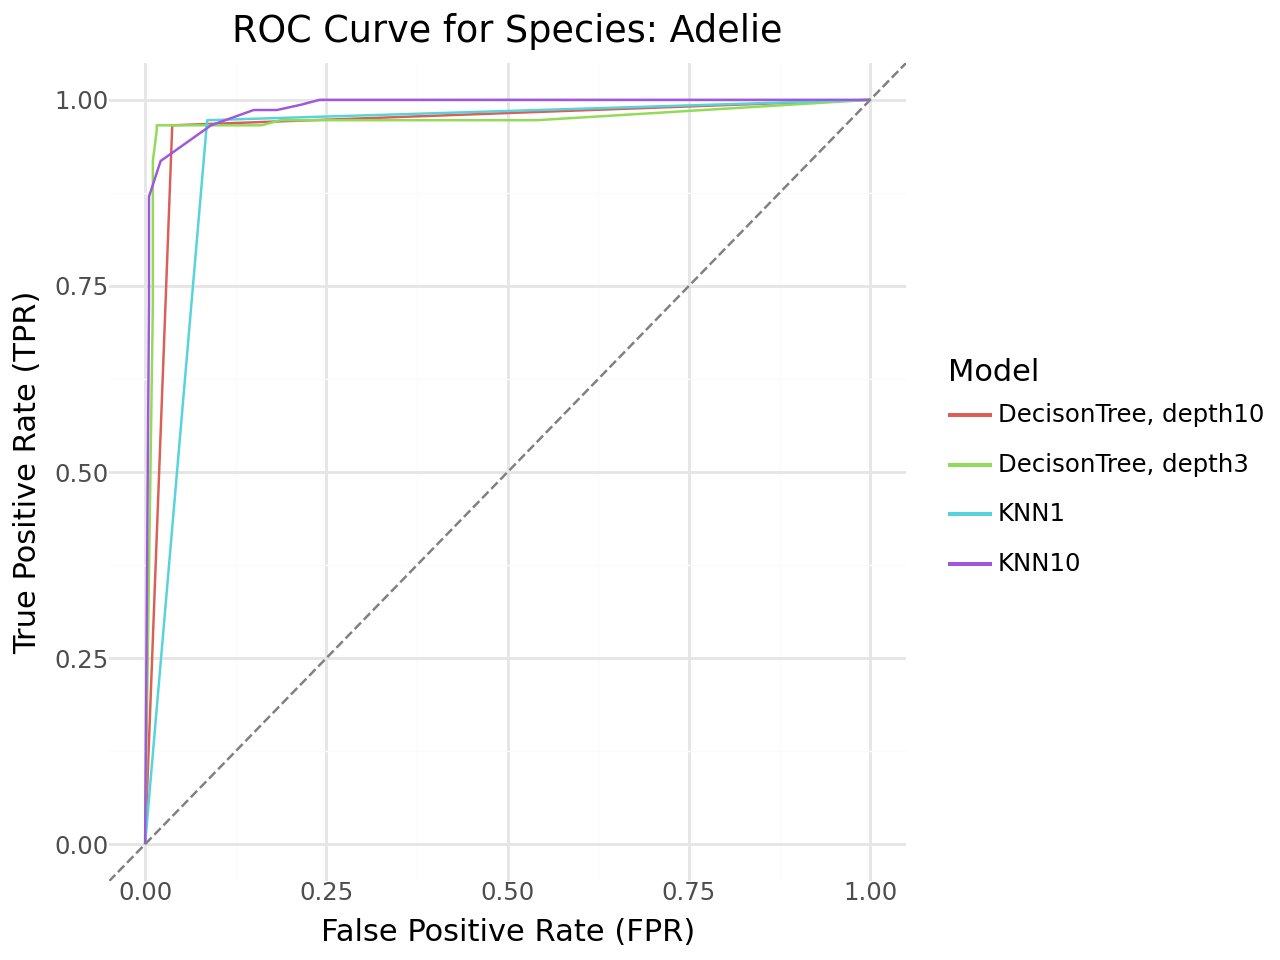

In [163]:
(
    ggplot(roc, aes(x='FPR', y='TPR', color='Model'))
    + geom_line()
    + geom_abline(linetype='dashed', color='gray')  # Diagonal line for random guess
    + labs(
        title="ROC Curve for Species: Adelie",
        x="False Positive Rate (FPR)",
        y="True Positive Rate (TPR)"
    )
    + theme_minimal()
)
